In [193]:
import numpy as np

X, Y = np.meshgrid([1, 2, 3], [4, 5, 6, 7])
X, Y

(array([[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]]), array([[4, 4, 4],
        [5, 5, 5],
        [6, 6, 6],
        [7, 7, 7]]))

In [194]:
def makeData ():
    # Строим сетку в интервале от -10 до 10 с шагом 0.1 по обоим координатам
    x = np.arange (-10, 10, 0.1)
    y = np.arange (-1, 1, 0.1)

    # Создаем двумерную матрицу-сетку
    xgrid, ygrid = np.meshgrid(x, y)

    # В узлах рассчитываем значение функции
    zgrid = np.sin (xgrid) * np.sin (ygrid) / (xgrid * ygrid)
    return xgrid, ygrid, zgrid

In [195]:
x, y, z = makeData()

In [196]:
import pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LinearSegmentedColormap


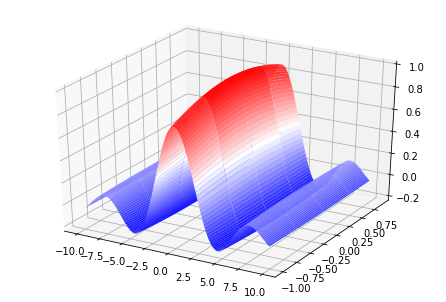

In [197]:
fig = pylab.figure()
axes = Axes3D(fig)

axes.plot_surface(x, y, z, rstride=5, cstride=1, cmap = LinearSegmentedColormap.from_list ("red_blue", ['b', 'w', 'r'], 256))

pylab.show()


In [237]:
W0 = 1e-3
L = 2e-6
Z0 = 0.0005
THETA = L/np.pi/W0
P = 1
A = 0
eps = 1e-1

In [232]:
def w(z): 
    return W0*(1 + (THETA*(z-Z0)/W0)**2)*0.5

def I(r, z):
    w_ = w(z)
    return 2*P/(np.pi*w_**2)*np.exp((-2*abs(r)**2/(w_**2) - A*z))

In [233]:
r, z = np.meshgrid(np.arange(2*W0, -2*W0, -W0*1e-2),np.arange(0, Z0*1e-2, Z0*1e-4))
I_ = I(r, z)
I_

array([[3.22492353e-08, 4.43757997e-08, 6.09646510e-08, ...,
        8.36209544e-08, 6.09646510e-08, 4.43757997e-08],
       [3.22492337e-08, 4.43757974e-08, 6.09646478e-08, ...,
        8.36209501e-08, 6.09646478e-08, 4.43757974e-08],
       [3.22492320e-08, 4.43757951e-08, 6.09646447e-08, ...,
        8.36209458e-08, 6.09646447e-08, 4.43757951e-08],
       ...,
       [3.22490750e-08, 4.43755791e-08, 6.09643480e-08, ...,
        8.36205390e-08, 6.09643480e-08, 4.43755791e-08],
       [3.22490734e-08, 4.43755768e-08, 6.09643449e-08, ...,
        8.36205347e-08, 6.09643449e-08, 4.43755768e-08],
       [3.22490717e-08, 4.43755746e-08, 6.09643418e-08, ...,
        8.36205305e-08, 6.09643418e-08, 4.43755746e-08]])

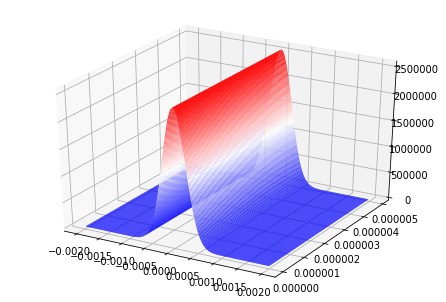

In [234]:
fig = pylab.figure()
axes = Axes3D(fig)

axes.plot_surface(r, z, I_, rstride=1, cstride=1, cmap = LinearSegmentedColormap.from_list ("red_blue", ['b', 'w', 'r'], 256))

pylab.show()


In [235]:
import matplotlib.pyplot as plt
%matplotlib inline


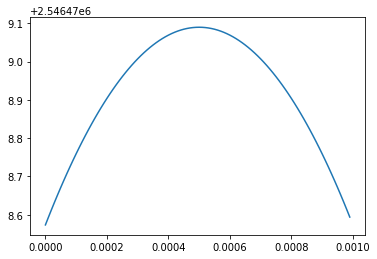

In [238]:
def I_0(z):
    return 2*P/(np.pi*w(z)**2)*np.exp(-A*z)

z = np.arange(0, 2*Z0, Z0*2e-2)
I_0_ = I_0(z)

plt.plot(z, I_0_)